In [45]:
from data import get_dataset, get_dividends
import pandas as pd 
import numpy as np 
from prophet import Prophet

df = get_dataset("EREGL.IS", period="3y")
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-02,5.030624,5.174178,5.018141,5.149212,35285644
2019-12-03,5.130488,5.180419,4.993175,5.024383,42990474
2019-12-04,5.061831,5.136729,5.005659,5.099280,32775458
2019-12-05,5.130488,5.149212,5.068073,5.074315,31374126
2019-12-06,5.074315,5.149212,5.049349,5.093039,35732398


In [46]:
def forecasting(data, date_column, value_column, train_size=0.75, freq='D', prediction_periods=30, country_code='TR'):
    """"
    Inputs:\n
    data: Dataframe\n
    date_column: Name of the Date column. If date column on the index you should write just name of that and keep moving.\n
    value_column: Price or whatever column that has the values.\n
    train_size: !! Where should function cut off the dataset as train.\n
    freq: Frequency of the data , default = Daily.\n
    \t\t'D':Daily, 'W':Weekly, 'Y':Yearly\n
    prediction_periods: How many periods you want to do forecast.\n
    country_name: Name of the country that datas belong it. It necessary for the holidays effect, default = TR\n
    \n
    Libraries: prophet from facebook\n
    \n
    Returns:\n
    model: Forecasting model.\n
    forecast: Predicted values.\n
    training_data: Training data.\n
    test_data: Test data\n
    """

    # importing the librarie(s)
    from prophet import Prophet
    import logging
    logging.getLogger('fbprophet').setLevel(logging.WARNING)    

    # prepare the data for forecasting
    data = data.reset_index()
    data = data[[date_column, value_column]].dropna(axis=0)
    data.columns = ['ds', 'y']

    # splitting for accuracy testing
    cutoff = data.iloc[int(np.round(len(data)*train_size)),]['ds']
    train = data[data['ds'] < cutoff]
    test = data[data['ds'] > cutoff]
    
    # model building
    model = Prophet()
    model.add_country_holidays(country_name=country_code)
    model.fit(train)
    
    # set future times to do forecasting
    future = model.make_future_dataframe(periods=prediction_periods, freq=freq)
    
    # make predictions
    forecast = model.predict(future)
    print("Process is Succesfully DONE!")
    
    return model, forecast, train, test

In [47]:
df = df.reset_index()
df = df[['Date', 'Close']].dropna(axis=0)
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2019-12-02,5.149212
1,2019-12-03,5.024383
2,2019-12-04,5.099280
3,2019-12-05,5.074315
4,2019-12-06,5.093039


In [57]:
cutoff = df.iloc[int(np.round(len(df)*0.85)),]['ds']
train = df[df['ds'] <= cutoff]
test = df[df['ds'] >= cutoff]
train.shape, test.shape, cutoff

((641, 2), (113, 2), datetime.date(2022, 6, 21))

In [49]:
from prophet import Prophet 
import logging 
logging.getLogger('fbprophet').setLevel(logging.WARNING)

model = Prophet()
model.add_country_holidays(country_name='TR')
model.fit(train)

10:40:20 - cmdstanpy - INFO - Chain [1] start processing
10:40:20 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
future = model.make_future_dataframe(periods=test.shape[0], freq='d')
future.shape, train.shape, test.shape

((754, 1), (641, 2), (113, 2))

In [59]:
future.shape[0] - train.shape[0] == test.shape[0]

True

In [52]:
forecast = model.predict(future)
forecast = forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]
forecast.shape

(754, 4)

In [54]:
test.shape, test.head(), test.tail()

((113, 2),
              ds          y
 640  2022-06-21  28.700001
 641  2022-06-22  28.200001
 642  2022-06-23  27.580000
 643  2022-06-24  27.860001
 644  2022-06-27  27.139999,
              ds          y
 748  2022-11-24  41.480000
 749  2022-11-25  41.880001
 750  2022-11-28  41.900002
 751  2022-11-29  41.860001
 752  2022-12-01  43.259998)

In [55]:
y_pred = 

((78, 2),
             ds       yhat
 640 2022-06-21  32.504077
 641 2022-06-22  32.520202
 642 2022-06-23  32.534502
 643 2022-06-24  32.492128
 646 2022-06-27  32.507963,
             ds       yhat
 747 2022-10-06  33.003431
 748 2022-10-07  33.004852
 751 2022-10-10  33.143061
 752 2022-10-11  33.230120
 753 2022-10-12  33.349207)

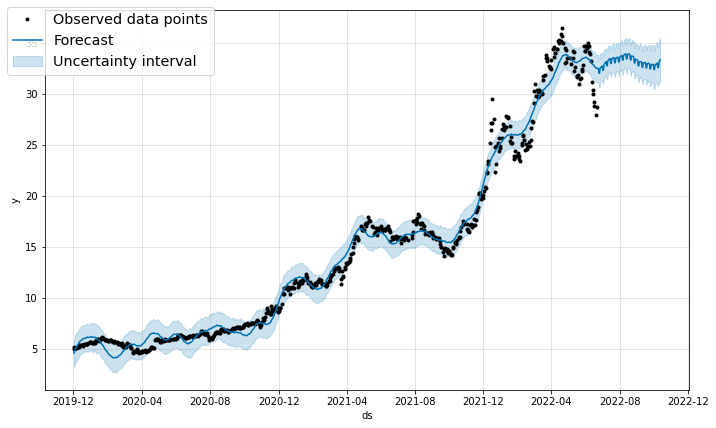

In [56]:
import matplotlib.pyplot as plt
fig = model.plot(forecast)
fig.legend(loc='upper left', fontsize='x-large')
plt.show()